In [4]:
import os
import pandas as pd

# cr -> Crop Recommendation
cr_file_path = "../Data/AtharvaIngle_CR.csv"

if not os.path.exists(cr_file_path):
    raise ValueError("Crop recommendation file cannot be found.")

cr_df = pd.read_csv(cr_file_path)
print(f"\"{cr_file_path}\" was loaded.")
print(cr_df.head())

del cr_file_path

"../Data/AtharvaIngle_CR.csv" was loaded.
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


Columns of Crop Recommendation file: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']
Information about each column:
	- Name: 'N'
		> Max: 140;
		> Min: 0;
		> Mean: 50.551818181818184;
		> Median: 37.0;
		> Deviation: 36.9173338337566;
		> Has null values: False.


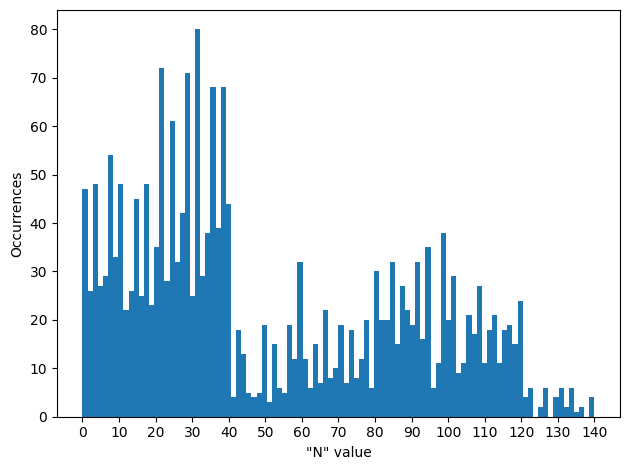

	- Name: 'P'
		> Max: 145;
		> Min: 5;
		> Mean: 53.36272727272727;
		> Median: 51.0;
		> Deviation: 32.98588273858715;
		> Has null values: False.


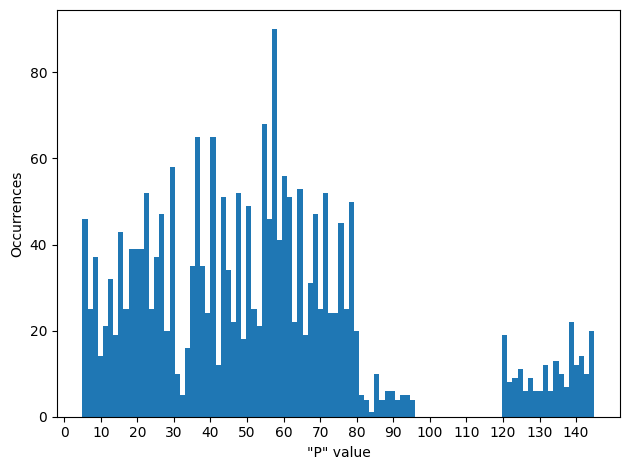

	- Name: 'K'
		> Max: 205;
		> Min: 5;
		> Mean: 48.14909090909091;
		> Median: 32.0;
		> Deviation: 50.64793054666013;
		> Has null values: False.


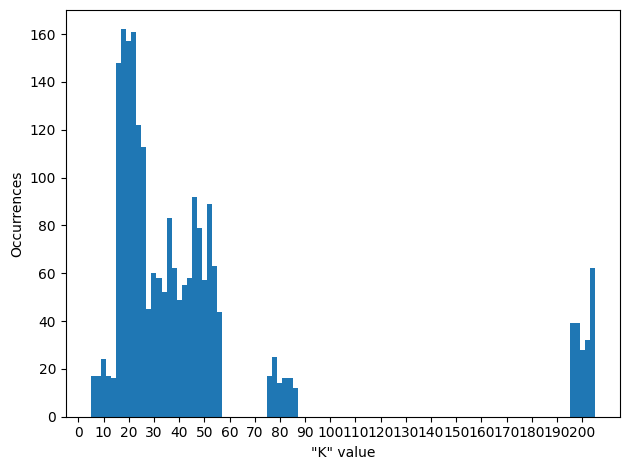

	- Name: 'temperature'
		> Max: 43.67549305;
		> Min: 8.825674745;
		> Mean: 25.616243851779544;
		> Median: 25.5986932;
		> Deviation: 5.063748599958843;
		> Has null values: False.


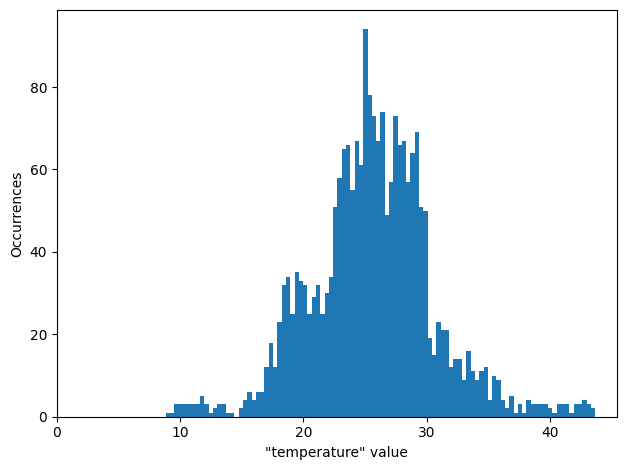

	- Name: 'humidity'
		> Max: 99.98187601;
		> Min: 14.25803981;
		> Mean: 71.48177921778637;
		> Median: 80.473145665;
		> Deviation: 22.263811589761083;
		> Has null values: False.


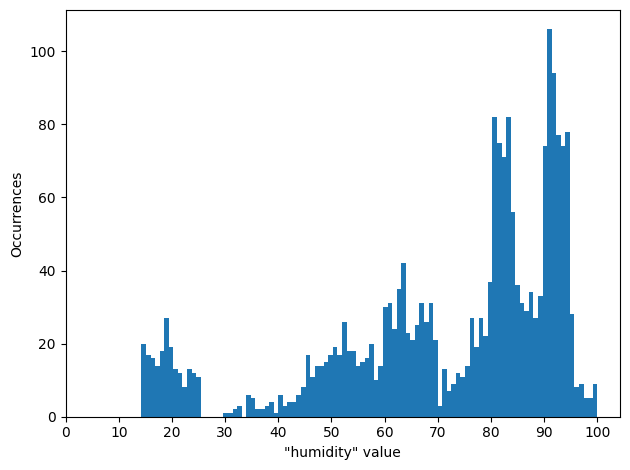

	- Name: 'ph'
		> Max: 9.93509073;
		> Min: 3.504752314;
		> Mean: 6.469480065256364;
		> Median: 6.42504527;
		> Deviation: 0.7739376880298733;
		> Has null values: False.


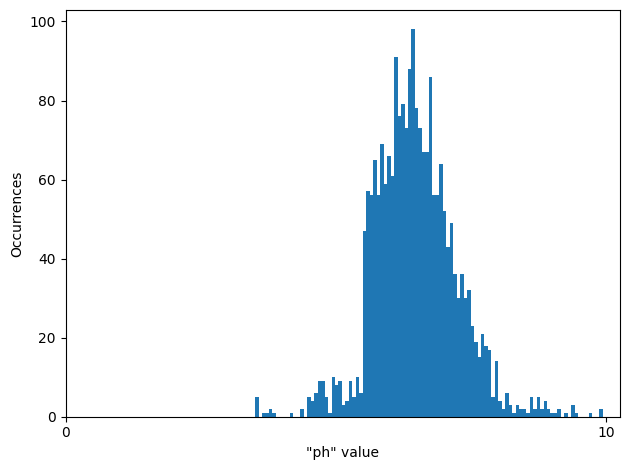

	- Name: 'rainfall'
		> Max: 298.5601175;
		> Min: 20.21126747;
		> Mean: 103.46365541576817;
		> Median: 94.86762427;
		> Deviation: 54.95838852487813;
		> Has null values: False.


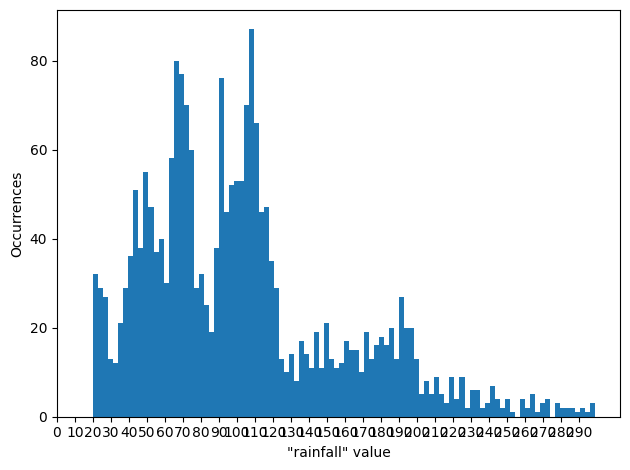

In [5]:
import matplotlib.pyplot as plt
import numpy as np

cols = list(cr_df.columns)
print(f"Columns of Crop Recommendation file: {cols}")

print("Information about each column:")
for c in cols[:-1]:
    # print(f"\t- {c} - Max: {cr_df[c].max()}; Min: {cr_df[c].min()}; Mean: {cr_df[c].mean()}; Median: {cr_df[c].median()}; Deviation: {cr_df[c].std()}" )
    print(f"\t- Name: '{c}'")
    print(f"\t\t> Max: {cr_df[c].max()};")
    print(f"\t\t> Min: {cr_df[c].min()};")
    print(f"\t\t> Mean: {cr_df[c].mean()};")
    print(f"\t\t> Median: {cr_df[c].median()};")
    print(f"\t\t> Deviation: {cr_df[c].std()};")
    print(f"\t\t> Has null values: {cr_df[c].isnull().values.any()}.")
    plt.xlabel(f"\"{c}\" value")
    plt.ylabel("Occurrences")
    plt.hist(cr_df[c].sort_values(), bins=100)
    plt.tight_layout()
    plt.xticks(np.arange(0, cr_df[c].max() + 1, 10))
    plt.show()

label
apple          100
banana         100
blackgram      100
chickpea       100
coconut        100
coffee         100
cotton         100
grapes         100
jute           100
kidneybeans    100
lentil         100
maize          100
mango          100
mothbeans      100
mungbean       100
muskmelon      100
orange         100
papaya         100
pigeonpeas     100
pomegranate    100
rice           100
watermelon     100
dtype: int64


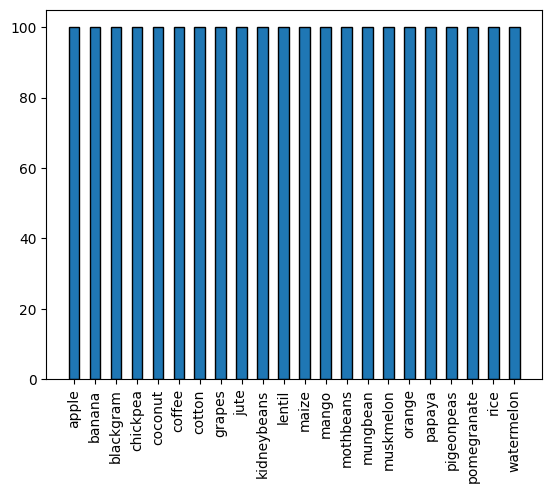

In [6]:
all_labels = cr_df["label"].unique()

print(cr_df.groupby("label").size())

plt.xticks(rotation=90)
plt.hist(cr_df["label"].sort_values(), bins=np.arange(all_labels.size + 1) - 0.5, rwidth=0.5, align="mid", ec="k")
plt.show()

## Data
As you can see the dataset is already cleaned up and balanced

### TODO
- Show correlation matrix (attributes)
- Show histogram of each column for each label as well metrics such, max value, min etc

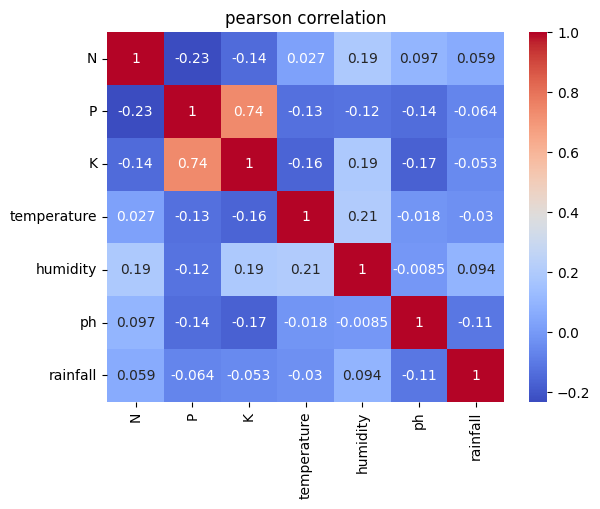

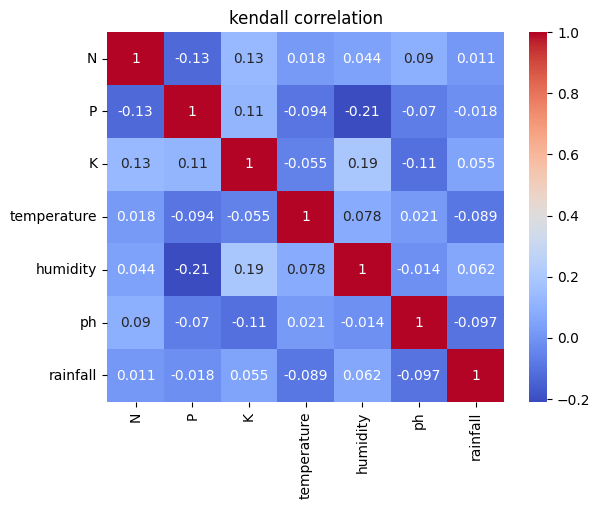

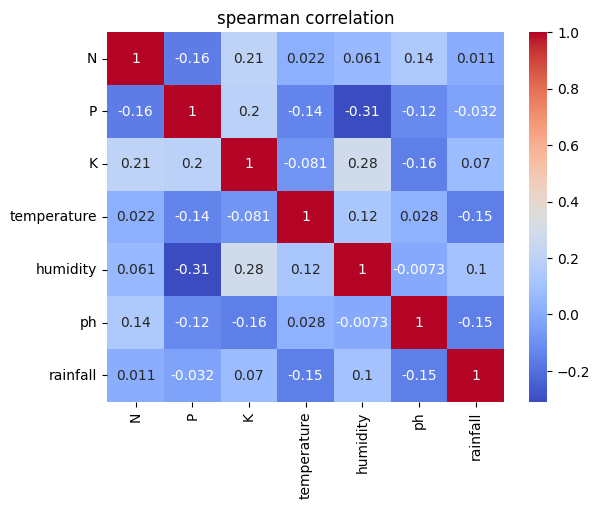

In [7]:
import seaborn as sns

for m in ["pearson", "kendall", "spearman"]:
    attr_corr = cr_df[cols[:-1]].corr(method=m)
    plt.figure()
    plt.title(f"{m} correlation")
    sns.heatmap(attr_corr, annot=True, cmap="coolwarm", xticklabels=attr_corr.columns.values, yticklabels=attr_corr.columns.values);